# Data Cleaning 

All libraries imported Successfully


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data = pd.read_csv("C:/Users/91750/Documents/DateSet/ESD2.csv")
#print(Data.isnull().sum())
print((Data.isnull().sum()/Data.shape[0])*100)

EEID              0.0
Full Name         0.0
Job Title         0.0
Department        0.0
Business Unit     0.0
Gender            0.0
Ethnicity         0.0
Age               0.0
Hire Date         0.0
Annual Salary     0.0
Bonus %           0.0
Country           0.0
City              0.0
Exit Date        91.5
dtype: float64


In [100]:
Data.isnull().sum().sum()

42

In [6]:
Data.shape

(56, 15)

In [9]:
(Data.isnull().sum().sum()/(Data.shape[0]*Data.shape[1]))*100

5.0

In [17]:
Data.notnull().sum().sum()

798

In [104]:
(Data.notnull().sum().sum()/(Data.shape[0]*Data.shape[1]))*100

95.0

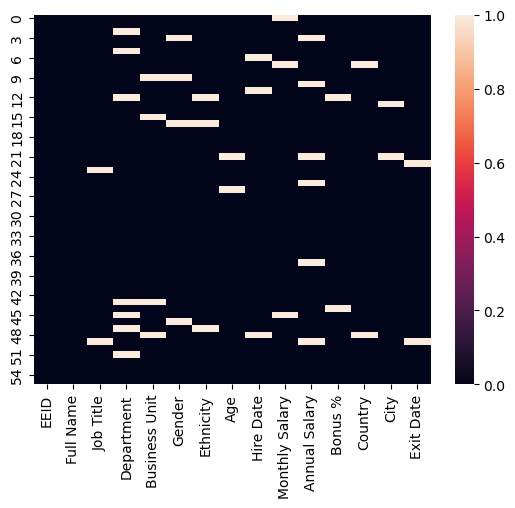

In [108]:
sns.heatmap(Data.isnull())
plt.show()

In [8]:
Data.drop(columns=["Department","Age"],inplace=True)
Data.shape

(56, 13)

In [90]:
Data.isnull().sum().sum()

0

In [82]:
Data.dropna(inplace=True)

In [102]:
Data.shape

(56, 15)

In [1]:
((56-33)/56)*100

41.07142857142857

In [110]:
Data.isnull().sum()

EEID              0
Full Name         0
Job Title         2
Department        7
Business Unit     4
Gender            4
Ethnicity         3
Age               2
Hire Date         3
Monthly Salary    3
Annual Salary     6
Bonus %           2
Country           2
City              2
Exit Date         2
dtype: int64

# fill Null Value

In [10]:
Data.fillna("puneet")
Data.head()

,EEID,Full Name,Job Title,Business Unit,Gender,Ethnicity,Hire Date,Monthly Salary,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,Research & Development,Female,Black,4/8/2016,NaN,141604.0,15.00%,United States,Seattle,4/6/2026
1,E04105,Theodore Dinh,Technical Architect,Manufacturing,Male,Asian,11/29/1997,8331.25,99975.0,0.00%,China,Chongqing,11/27/2007
2,E02572,Luna Sanders,Director,Speciality Products,Female,Caucasian,10/26/2006,13591.58,163099.0,20.00%,United States,Chicago,10/23/2016
3,E02832,Penelope Jordan,Computer Systems Manager,Manufacturing,NaN,Caucasian,9/27/2019,0.00,NaN,7.00%,United States,Chicago,9/24/2029
4,E01639,Austin Vo,Sr. Analyst,Manufacturing,Male,Asian,11/20/1995,7950.75,95409.0,0.00%,United States,Phoenix,11/17/2005


In [11]:
Data.fillna(method="bfill",axis=1)
Data.head(3)

C:\Users\91750\AppData\Local\Temp\ipykernel_10012\1234837237.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data.fillna(method="bfill",axis=1)


,EEID,Full Name,Job Title,Business Unit,Gender,Ethnicity,Hire Date,Monthly Salary,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,Research & Development,Female,Black,4/8/2016,NaN,141604.0,15.00%,United States,Seattle,4/6/2026
1,E04105,Theodore Dinh,Technical Architect,Manufacturing,Male,Asian,11/29/1997,8331.25,99975.0,0.00%,China,Chongqing,11/27/2007
2,E02572,Luna Sanders,Director,Speciality Products,Female,Caucasian,10/26/2006,13591.58,163099.0,20.00%,United States,Chicago,10/23/2016


In [7]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EEID            56 non-null     object 
 1   Full Name       56 non-null     object 
 2   Job Title       54 non-null     object 
 3   Department      49 non-null     object 
 4   Business Unit   52 non-null     object 
 5   Gender          52 non-null     object 
 6   Ethnicity       53 non-null     object 
 7   Age             54 non-null     float64
 8   Hire Date       53 non-null     object 
 9   Monthly Salary  53 non-null     float64
 10  Annual Salary   50 non-null     float64
 11  Bonus %         54 non-null     object 
 12  Country         54 non-null     object 
 13  City            54 non-null     object 
 14  Exit Date       54 non-null     object 
dtypes: float64(3), object(12)
memory usage: 6.7+ KB


In [17]:
Data.select_dtypes(include="object").columns
Data.isnull().sum()


EEID              0
Full Name         0
Job Title         2
Department        0
Business Unit     4
Gender            4
Ethnicity         3
Age               2
Hire Date         3
Monthly Salary    3
Annual Salary     6
Bonus %           2
Country           2
City              2
Exit Date         2
dtype: int64

In [ ]:
Data["Department"].mode()[0]
Data["Department"].fillna(Data["Department"].mode()[0],inplace=True)
print(Data["Department"])

In [27]:
Data.select_dtypes(include="object").columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Hire Date', 'Bonus %', 'Country', 'City',
       'Exit Date'],
      dtype='object')

In [73]:
for i in Data.select_dtypes(include="object").columns:
    Data[i].fillna(Data[i].mode()[0],inplace=True)
    

C:\Users\91750\AppData\Local\Temp\ipykernel_3836\2681815810.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data[i].fillna(Data[i].mode()[0],inplace=True)


In [35]:
Data.isnull().sum()
Data.select_dtypes(include="float64").columns

Index(['Age', 'Monthly Salary', 'Annual Salary'], dtype='object')

In [129]:
from sklearn.impute import SimpleImputer

In [93]:
si = SimpleImputer(strategy="mean")
ar=si.fit_transform(Data[['Age', 'Monthly Salary', 'Annual Salary']])
NewDataset=pd.DataFrame(ar,columns=Data.select_dtypes(include="float64").columns)

In [85]:
NewDataset
NewDataset.isnull().sum()

Age               0
Monthly Salary    0
Annual Salary     0
dtype: int64

In [75]:
NewDataset['Monthly Salary'].mean()


8288.71

In [101]:
si = SimpleImputer(strategy="mean")
Data[['Age','Monthly Salary','Annual Salary']]=si.fit_transform(Data[['Age','Monthly Salary','Annual Salary']])

In [103]:
Data.isnull().sum()

EEID              0
Full Name         0
Job Title         0
Department        0
Business Unit     0
Gender            0
Ethnicity         0
Age               0
Hire Date         0
Monthly Salary    0
Annual Salary     0
Bonus %           0
Country           0
City              0
Exit Date         0
dtype: int64

# Encoding

# one hot encoding

In [109]:
Data["Country"].unique()

array(['United States', 'China', 'Brazil'], dtype=object)

In [ ]:
new_Data = Data[Data["Country"]!="Brazil"]
en_data = new_Data[["Gender","Country"]]

In [127]:
pd.get_dummies(en_data)
pd.get_dummies(en_data).info()


<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Gender_Female          51 non-null     bool 
 1   Gender_Male            51 non-null     bool 
 2   Country_China          51 non-null     bool 
 3   Country_United States  51 non-null     bool 
dtypes: bool(4)
memory usage: 612.0 bytes


In [228]:
from sklearn.preprocessing import OneHotEncoder

In [139]:
ohe = OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data).toarray()
ar

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.]])

In [143]:
pd.DataFrame(ar,columns=["Gender_Male","Country_United States"])

,Gender_Male,Country_United States
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,0.0
6,0.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


# label Encoding

In [ ]:
ohe = OneHotEncoder(drop="first")
new_Data[["Gender_Male","Country_United States"]]=ohe.fit_transform(en_data).toarray()
new_Data

In [199]:
from sklearn.preprocessing import LabelEncoder

In [147]:
df = pd.DataFrame({"Name":["puneet","Rohit","Pushpa","Sonam","Hiresh"]})
df

,Name
0,puneet
1,Rohit
2,Pushpa
3,Sonam
4,Hiresh


In [153]:
le = LabelEncoder()
le.fit(df["Name"])

LabelEncoder()

In [159]:
df["en_name"]=le.transform(df["Name"])

In [161]:
df

,Name,en_name
0,puneet,4
1,Rohit,2
2,Pushpa,1
3,Sonam,3
4,Hiresh,0


In [175]:
le = LabelEncoder()
le.fit(Data["Ethnicity"])

LabelEncoder()

In [179]:
Data["en_Ethnicity"]=le.transform(Data["Ethnicity"])

C:\Users\91750\AppData\Local\Temp\ipykernel_3836\3418584573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["en_Ethnicity"]=le.transform(Data["Ethnicity"])


# ordinal Encoding

In [204]:
from sklearn.preprocessing import OrdinalEncoder

In [202]:
df = pd.DataFrame({"sizes":["S","M","L","S","XL","M","S","XL","M","M","XL","S"]})

,sizes
0,S
1,M
2,L
3,S
4,XL
5,M
6,S
7,XL
8,M
9,M


In [206]:
ord_data = [["S","M","L","XL"]]


In [210]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df[["sizes"]])

OrdinalEncoder(categories=[['S', 'M', 'L', 'XL']])

In [214]:
df["en_sizes"]=oe.transform(df[["sizes"]])
df

,sizes,en_sizes
0,S,0.0
1,M,1.0
2,L,2.0
3,S,0.0
4,XL,3.0
5,M,1.0
6,S,0.0
7,XL,3.0
8,M,1.0
9,M,1.0


In [224]:
ord_data1 = {"S":0,"M":1,"L":2,"XL":3}

In [226]:
df["en_size_map"]=df["sizes"].map(ord_data1)
df

,sizes,en_sizes,en_size_map
0,S,0.0,0
1,M,1.0,1
2,L,2.0,2
3,S,0.0,0
4,XL,3.0,3
5,M,1.0,1
6,S,0.0,0
7,XL,3.0,3
8,M,1.0,1
9,M,1.0,1


In [240]:
ord_Ethnicity_data = [['Black', 'Asian', 'Caucasian', 'Latino']]

In [242]:
en = OrdinalEncoder(categories=ord_Ethnicity_data)
en.fit(Data[["Ethnicity"]])

OrdinalEncoder(categories=[['Black', 'Asian', 'Caucasian', 'Latino']])

In [246]:
Data["Ordinal_en_Ethnidata"]=en.transform(Data[["Ethnicity"]])

C:\Users\91750\AppData\Local\Temp\ipykernel_3836\819992947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["Ordinal_en_Ethnidata"]=en.transform(Data[["Ethnicity"]])
